## Advective and diffuisive fluxes from model output throug boxes
### 3D diffusivity vs only GMREDI

This notebook is a first look at the model's diffusive and advective fluxes form the diagnostics package.
Frequency of output is 43200 s (half a day) and the size of the fields is 360x360x90x20.

Filename: Flux_TH (Theta), Flux_SLT (salinity)

| Variable   |   Units         | Description  | Coordinates  | Size                  |
|------------|:---------------:|-------------:|:-------------|:---------------------:|:--------------------------:
| ADVr_TH     | $^{\circ}C m^3s^{-1}$ | Vertical Advective Flux of Pot.Temperature|(T, Z, Y, X) | (16,90,360,360)
| ADVx_TH     | $^{\circ}C m^3s^{-1}$ | Zonal Advective Flux of Pot.Temperature | (T, Z, Y, Xp1) | (16,90,360,361)
| ADVy_TH     | $^{\circ}C m^3s^{-1}$ | Meridional Advective Flux of Pot.Temperature|(T, Z, Yp1, X) | (16,90,361,360)
| DFrE_TH     | $^{\circ}C m^3s^{-1}$ | Vertical Diffusive Flux of Pot.Temperature (Explicit part)|(T, Z, Y, X) | (16,90,360,360)
| DFxE_TH     | $^{\circ}C m^3s^{-1}$ | Zonal      Diffusive Flux of Pot.Temperature|(T, Z, Y, Xp1) | (16,90,360,361)
| DFyE_TH     | $^{\circ}C m^3s^{-1}$ | Meridional Diffusive Flux of Pot.Temperature|(T, Z, Yp1, X) | (16,90,361,360)
| DFrI_TH     | $^{\circ}C m^3s^{-1}$ | Vertical Diffusive Flux of Pot.Temperature (Implicit part)|(T, Z, Y, X) | (16,90,360,360)   

Same for salinity.

For passive tracers, there are 3 extra fields besides these fluxes. Units correspond to what I entered as units in data.ptracers but it really doesn't matter.

Filename: FluxTR01, FluxTr02 

| Variable    |   Units                       | Description  | Coordinates           | Size                      |
|------------ |:----------------------------: |:-------------|:---------------------:|:--------------------------:
| UTRAC01     |  $Mol\ l^{-1}\cdot ms^{-1}$   |Zonal Mass-Weighted Transp of Tr01   | (T, Z, Y, Xp1) | (16,90,360,361)
| VTRAC01     |  $Mol\ l^{-1}\cdot ms^{-1}$   |Meridional Mass-Weighted Transp of Tr01|(T, Z, Yp1, X) | (16,90,361,360)
| WTRAC01     |  $Mol\ l^{-1}\cdot ms^{-1}$   |Vertical Mass-Weighted Transp of Tr01|(T, Z, Y, X) | (16,90,360,360)
| ADVrTr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ |Vertical Advective Flux of Tr01|(T, Z, Y, X) | (16,90,360,360)
| ADVxTr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ |Zonal Advective Flux of Tr01 |(T, Z, Y, Xp1) | (16,90,360,361)
| ADVyTr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ |Meridional Advective Flux of Tr01|(T, Z, Yp1, X) | (16,90,361,360)
| DFrETr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ |Vertical Diffusive Flux of Tr01 (Explicit part)|(T, Z, Y, X)| (16,90,360,360)
| DFxETr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ | Zonal      Diffusive Flux of Tr01|(T, Z, Y, Xp1) | (16,90,360,361)
| DFyETr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ | Meridional Diffusive Flux of Tr01|(T, Z, Yp1, X) | (16,90,361,360)
| DFrITr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ | Vertical Diffusive Flux of Tr01 (Implicit part)| (T, Z, Y, X) | (16,90,360,360) 
 


In [1]:
#import gsw as sw # Gibbs seawater package

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

/home/kramosmu/anaconda/lib/python2.7/site-packages/mpl_toolkits/__init__.py:2: UserWarning: Module MITgcmutils was already imported from MITgcmutils/__init__.pyc, but /home/kramosmu/anaconda/lib/python2.7/site-packages/MITgcmutils-0.1.0-py2.7.egg is being added to sys.path
  __import__('pkg_resources').declare_namespace(__name__)


In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import TransportTools_MITgcm as trt

In [3]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('notebook')

In [44]:
CanyonGrid='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)
CanyonState='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

FluxTH = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/FluxTHGlob.nc'
FluxSLT = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/FluxSLTGlob.nc'
FluxTR01 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/FluxTr01Glob.nc'
FluxTR02 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/FluxTr02Glob.nc'
FluxOut = Dataset(FluxTR02)


In [45]:
# 3D diffusivity run

FluxTH3D = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz_FluxDiagnostics/run01/FluxTHGlob.nc'
FluxSLT3D = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz_FluxDiagnostics/run01/FluxSLTGlob.nc'
FluxTR013D = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz_FluxDiagnostics/run01/FluxTR01Glob.nc'
FluxOut3D = Dataset(FluxTR013D)


In [6]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
#print(z[10])
Times = CanyonStateOut.variables['T']
TimesFlux = FluxOut.variables['T']

#print(TimesFlux[:])
xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells (Y,X)
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells (Y,X)

xp1 = rout.getField(CanyonGrid, 'XG') # x coords vorticity cells (Yp1,Xp1)
yp1 = rout.getField(CanyonGrid, 'YG') # y coords vorticity cells (Yp1,Xp1)

drF = CanyonGridOut.variables['drF'] # vertical distance between faces
dxG = rout.getField(CanyonGrid,'dxG')
bathy = rout.getField(CanyonGrid, 'Depth')

rA = rout.getField(CanyonGrid, 'rA') # area of cells (x-y)

hFacC = rout.getField(CanyonGrid, 'HFacC') # (Z,Y,X) for vertical fluxes
MaskC = rout.getMask(CanyonGrid,'HFacC') 

hFacW = rout.getField(CanyonGrid, 'HFacW') # (Z,Y,Xp1) for zonal fluxes
MaskW = rout.getMask(CanyonGrid,'HFacW') 

hFacS = rout.getField(CanyonGrid, 'HFacS') # (Z,Yp1,X) for meridional fluxes
MaskS = rout.getMask(CanyonGrid,'HFacS') 


###Vertical fluxes within the canyon

See notebook TransportThroughBoxes.ipynb for definitions of the planes.

In [7]:
#Vertical Fluxes
ADVrTH = rout.getField(FluxTH,'ADVr_TH') # Vertical advective transport THETA
ADVrSLT = rout.getField(FluxSLT,'ADVr_SLT') # Vertical advective transport 
ADVrTR01 = rout.getField(FluxTR01,'ADVrTr01') # Vertical advective transport 
ADVrTR02 = rout.getField(FluxTR02,'ADVrTr02') # Vertical advective transport 


In [8]:
DFrITR01 = rout.getField(FluxTR01,'DFrITr01') # Vertical diff flux implicit
DFrETR01 = rout.getField(FluxTR01,'DFrETr01') # Vertical diff flux implicit

WTRAC01 = rout.getField(FluxTR01,'WTRAC01')


In [9]:
#Vertical Fluxes
ADVrTH3D = rout.getField(FluxTH3D,'ADVr_TH') # Vertical advective transport THETA
ADVrSLT3D = rout.getField(FluxSLT3D,'ADVr_SLT') # Vertical advective transport 
ADVrTR013D = rout.getField(FluxTR013D,'ADVrTr01') # Vertical advective transport 

DFrITR013D = rout.getField(FluxTR013D,'DFrITr01') # Vertical diff flux implicit
DFrETR013D = rout.getField(FluxTR013D,'DFrETr01') # Vertical diff flux implicit

WTRAC013D = rout.getField(FluxTR013D,'WTRAC01')


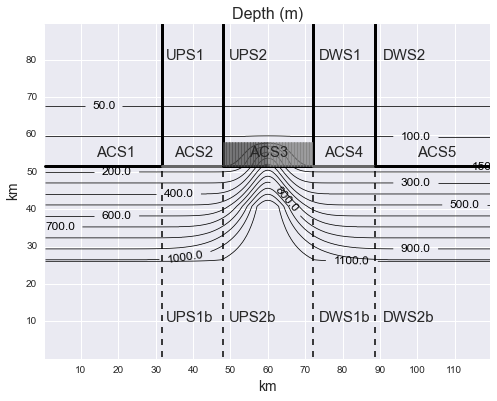

In [82]:
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(8,6))

### Across-Shelf Planes ###

# UPS1b and UPS1
plt.plot(xc[:,40],yc[:,40],'k--',linewidth=1.5 )

plt.plot(xc[197:,40],yc[197:,40],'-',linewidth=3, linestyle='-', color='0.00' )


# UPS2b and UPS2
plt.plot(xc[:,120],yc[:,120],'k--',linewidth=1.5 )

plt.plot(xc[197:,120],yc[197:,120],'-', linewidth=3, linestyle='-', color='0.0')

# DWS1 and DWS1b
plt.plot(xc[:,240],yc[:,240],'k--',linewidth=1.5 )

plt.plot(xc[197:,240],yc[197:,240],'-',linewidth=3, linestyle='-', color='0.0' )


# DWS2 and DWN2b
plt.plot(xc[:,320],yc[:,320],'k--',linewidth=1.5 )

plt.plot(xc[197:,320],yc[197:,320],'-',linewidth=3, linestyle='-', color='0.0' )

### Along Shelf Planes ###

# ACS1 
plt.plot(xc[197,:40],yc[197,:40],'-',linewidth=3, linestyle='-', color='0.0' )

# ACS2
plt.plot(xc[197,40:120],yc[197,40:120],'-', linewidth=3, linestyle='-', color='0.4')

# ACS3
plt.plot(xc[197,120:240],yc[197,120:240],'-',linewidth=3, linestyle='-', color='0.0' )

# ACS4
plt.plot(xc[197,240:320],yc[197,240:320],'-',linewidth=3, linestyle='-', color='0.40' )

# ACS5
plt.plot(xc[197,320:360],yc[197,320:360],'-',linewidth=3, linestyle='-', color='0.0' )

#LID1
plt.plot(xc[197:230,120:180],yc[197:230,120:180],linewidth=0.75, linestyle='-', color='0.3')

#LID2
plt.plot(xc[197:230,180:240],yc[197:230,180:240],linewidth=0.75, linestyle='-', color='0.5')

lev = range(200,1200,100)

levels = [50,100,150]+lev

CS = plt.contour(xc,yc,bathy,levels,colors='k',linewidths=[0.75,0.75,1,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75] )

plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=12)



plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('km',fontsize=14)

plt.title('Depth (m)',fontsize=16)

plt.annotate('UPS1', xy=(33000, 80000), xytext=(33000, 80000))
plt.annotate('UPS1b', xy=(33000, 10000), xytext=(33000, 10000))
plt.annotate('UPS2', xy=(50000, 80000), xytext=(50000, 80000))
plt.annotate('UPS2b', xy=(50000, 10000), xytext=(50000, 10000))
plt.annotate('DWS1', xy=(74000, 80000), xytext=(74000, 80000))
plt.annotate('DWS1b', xy=(74000, 10000), xytext=(74000, 10000))
plt.annotate('DWS2', xy=(91000, 80000), xytext=(91000, 80000))
plt.annotate('DWS2b', xy=(91000, 10000), xytext=(91000, 10000))
plt.annotate('ACS1', xy=(14000, 54000), xytext=(14000, 54000))
plt.annotate('ACS2', xy=(35000, 54000), xytext=(35000, 54000))
plt.annotate('ACS3', xy=(55000, 54000), xytext=(55000, 54000))
plt.annotate('ACS4', xy=(75000, 54000), xytext=(75000, 54000))
plt.annotate('ACS5', xy=(100000, 54000), xytext=(100000, 54000))


#plt.savefig('AcrossShoreLines.png', bbox_inches='tight')
#plt.savefig('AcrossShoreLines.pdf', bbox_inches='tight')


In [13]:
#LID1
LID1 = [range(197,360),range(120,180)]

#LID2
LID2 = [range(197,360),range(180,240)]


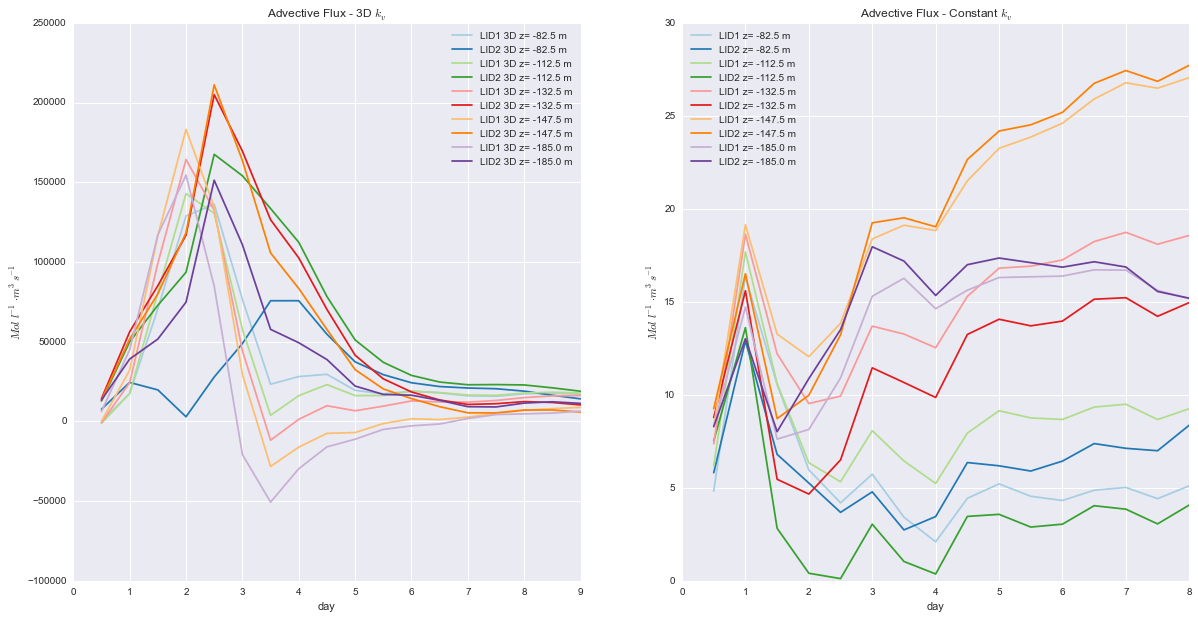

In [69]:

timearray = np.linspace(0.5,8,16)
timearray3D = np.linspace(0.5,9,18)
depths = [16,22,26,29,35]
figSize=(20,10)

unitsTr = '$Mol\ l^{-1}\cdot m^3s^{-1}$'


fig44 = plt.figure(figsize=figSize)
     
kk = 1
    
with sns.color_palette("Paired",10):
    for zz in depths:

        FluxV3D = ADVrTR013D[:,zz,197:,120:180]

        plt.subplot(1,2,1)
        ax = plt.gca()

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = ADVrTR013D[:,zz,197:,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Advective Flux - 3D $k_v$')

        plt.subplot(1,2,2)
        ax = plt.gca()

        FluxV = ADVrTR01[:,zz,197:,120:180]
        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1 z= %.1f m' %z[zz]))
        FluxV = ADVrTR01[:,zz,197:,180:240]
        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2 z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Advective Flux - Constant $k_v$')

        


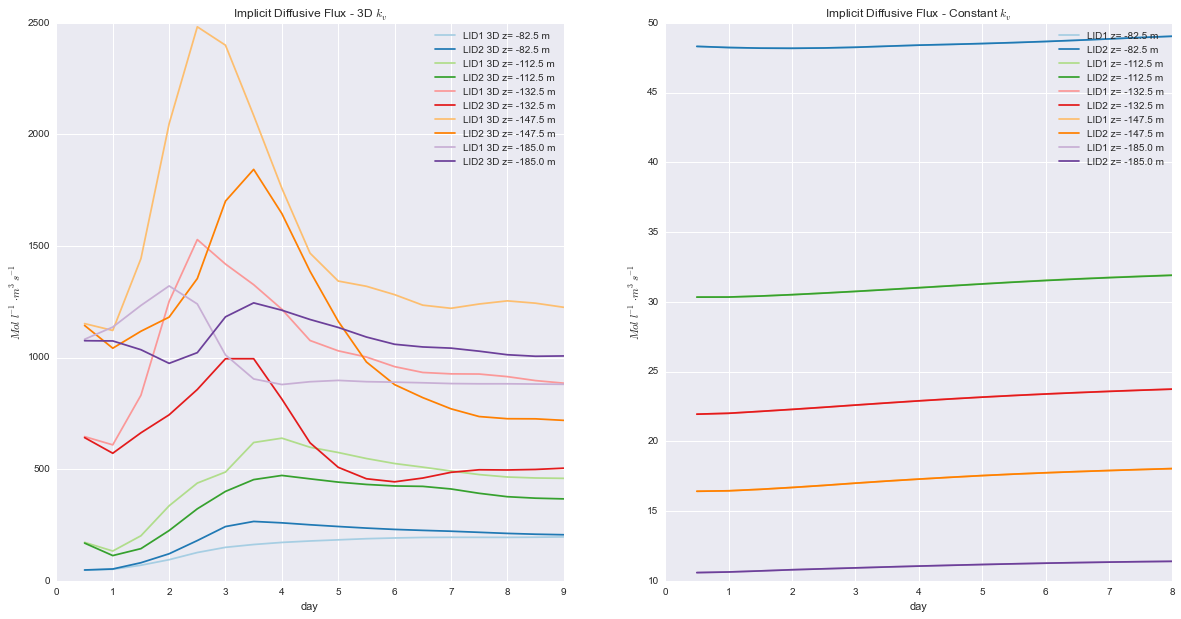

In [68]:
timearray = np.linspace(0.5,8,16)
timearray3D = np.linspace(0.5,9,18)
depths = [16,22,26,29,35]
figSize=(20,10)

unitsTr = '$Mol\ l^{-1}\cdot m^3s^{-1}$'


fig44 = plt.figure(figsize=figSize)
     
kk = 1
    
with sns.color_palette("Paired",10):
    for zz in depths:

        FluxV3D = DFrITR013D[:,zz,197:,120:180]

        plt.subplot(1,2,1)
        ax = plt.gca()

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = DFrITR013D[:,zz,197:,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Implicit Diffusive Flux - 3D $k_v$')

        plt.subplot(1,2,2)
        ax = plt.gca()

        FluxV = DFrITR01[:,zz,197:,120:180]
        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1 z= %.1f m' %z[zz]))
        FluxV = DFrITR01[:,zz,197:,180:240]
        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2 z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Implicit Diffusive Flux - Constant $k_v$')

        

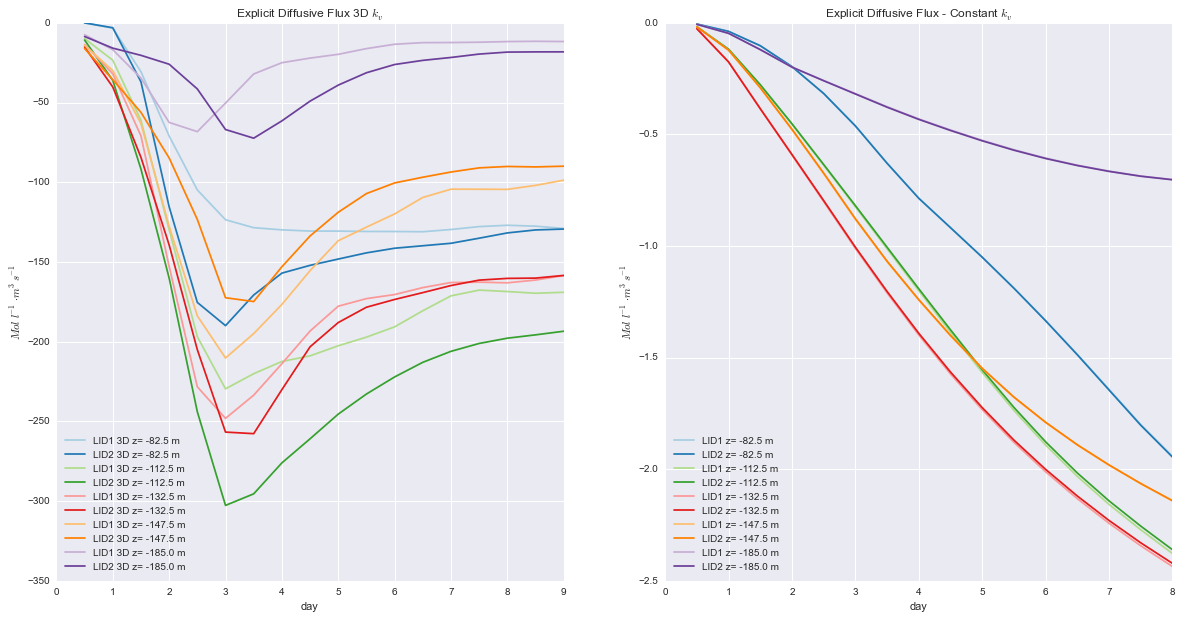

In [66]:
timearray = np.linspace(0.5,8,16)
timearray3D = np.linspace(0.5,9,18)
depths = [16,22,26,29,35]
figSize=(20,10)

unitsTr = '$Mol\ l^{-1}\cdot m^3s^{-1}$'


fig44 = plt.figure(figsize=figSize)
     
kk = 1
    
with sns.color_palette("Paired",10):
    for zz in depths:

        FluxV3D = DFrETR013D[:,zz,197:,120:180]

        plt.subplot(1,2,1)
        ax = plt.gca()

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = DFrETR013D[:,zz,197:,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Explicit Diffusive Flux 3D $k_v$')

        plt.subplot(1,2,2)
        ax = plt.gca()

        FluxV = DFrETR01[:,zz,197:,120:180]
        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1 z= %.1f m' %z[zz]))
        FluxV = DFrETR01[:,zz,197:,180:240]
        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2 z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Explicit Diffusive Flux - Constant $k_v$')

        

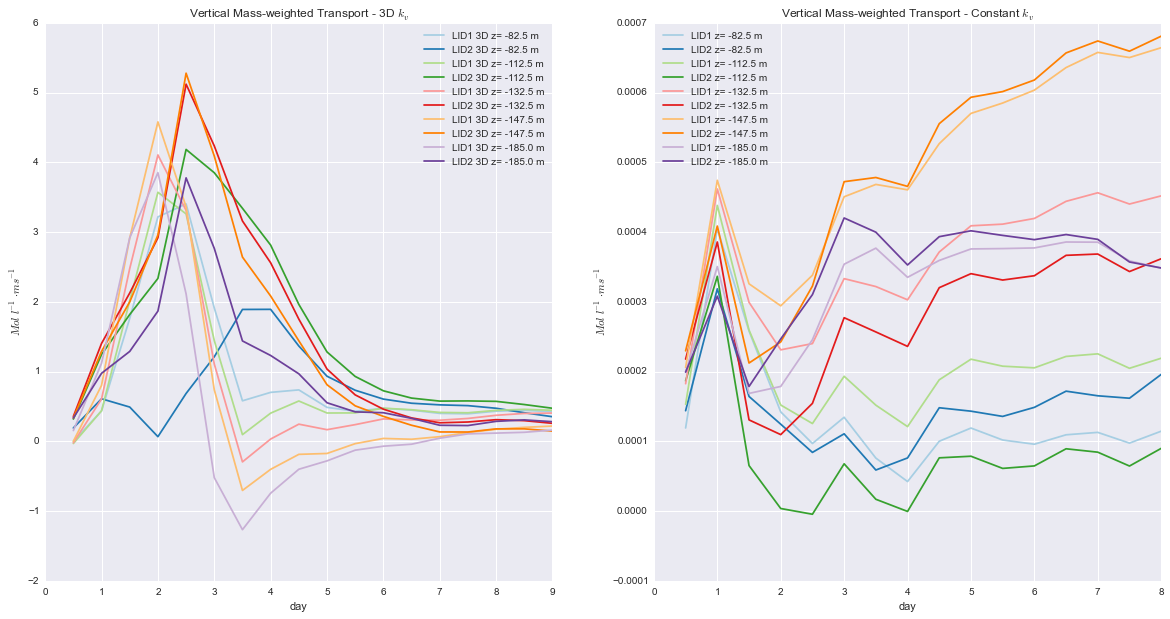

In [70]:
timearray = np.linspace(0.5,8,16)
timearray3D = np.linspace(0.5,9,18)
depths = [16,22,26,29,35]
figSize=(20,10)

unitsTr = '$Mol\ l^{-1}\cdot ms^{-1}$'


fig44 = plt.figure(figsize=figSize)
     
kk = 1
    
with sns.color_palette("Paired",10):
    for zz in depths:

        FluxV3D = WTRAC013D[:,zz,197:,120:180]

        plt.subplot(1,2,1)
        ax = plt.gca()

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = WTRAC013D[:,zz,197:,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical Mass-weighted Transport - 3D $k_v$')

        plt.subplot(1,2,2)
        ax = plt.gca()

        FluxV = WTRAC01[:,zz,197:,120:180]
        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1 z= %.1f m' %z[zz]))
        FluxV = WTRAC01[:,zz,197:,180:240]
        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2 z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical Mass-weighted Transport - Constant $k_v$')


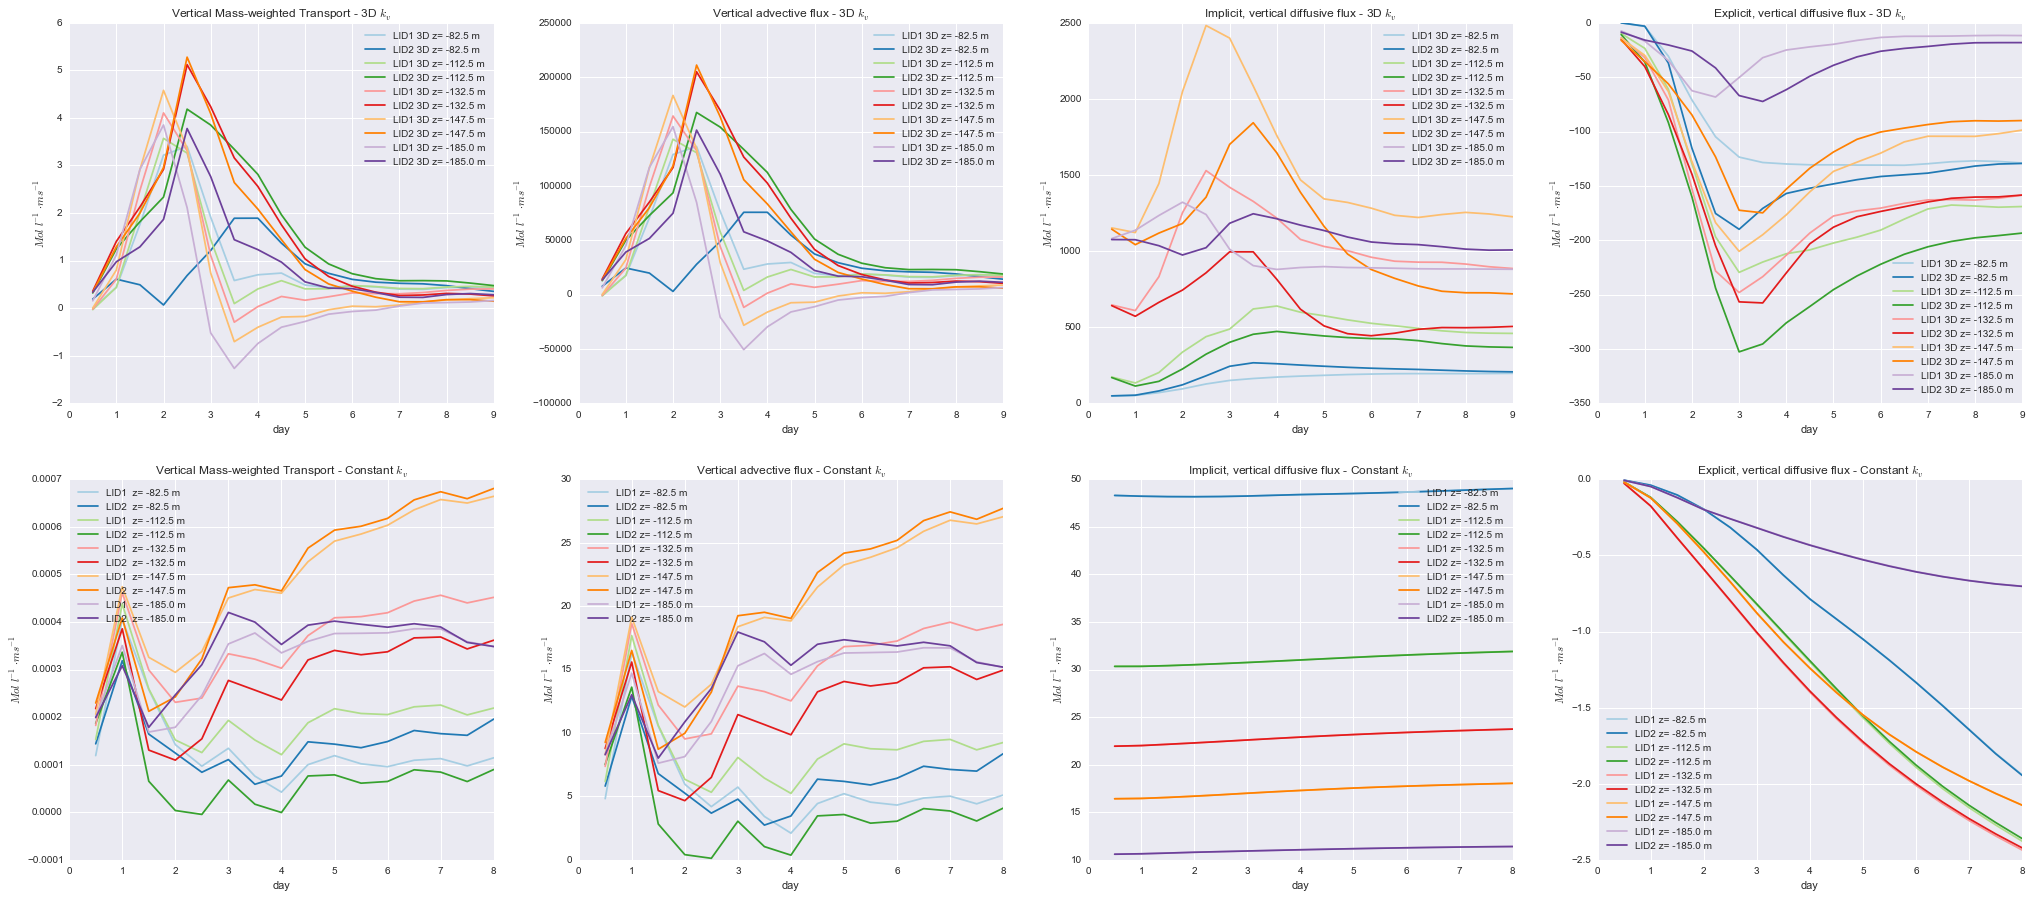

In [76]:
timearray = np.linspace(0.5,8,16)
timearray3D = np.linspace(0.5,9,18)
depths = [16,22,26,29,35]
figSize=(35,15)

unitsTr = '$Mol\ l^{-1}\cdot ms^{-1}$'


fig44 = plt.figure(figsize=figSize)
     
kk = 1
    
with sns.color_palette("Paired",10):
    for zz in depths:

        FluxV3D = WTRAC013D[:,zz,197:,120:180]

        plt.subplot(2,4,1)
        ax = plt.gca()

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = WTRAC013D[:,zz,197:,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical Mass-weighted Transport - 3D $k_v$')
        
        ##
        
        plt.subplot(2,4,2)
        ax = plt.gca()
        
        FluxV3D = ADVrTR013D[:,zz,197:,120:180]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = ADVrTR013D[:,zz,197:,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical advective flux - 3D $k_v$')
        
        ##
        
        plt.subplot(2,4,3)
        ax = plt.gca()
        
        FluxV3D = DFrITR013D[:,zz,197:,120:180]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = DFrITR013D[:,zz,197:,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Implicit, vertical diffusive flux - 3D $k_v$')
        
         ##
        
        plt.subplot(2,4,4)
        ax = plt.gca()
        
        FluxV3D = DFrETR013D[:,zz,197:,120:180]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = DFrETR013D[:,zz,197:,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Explicit, vertical diffusive flux - 3D $k_v$')
        
        ######
    
        FluxV = WTRAC01[:,zz,197:,120:180]

        plt.subplot(2,4,5)
        ax = plt.gca()

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1  z= %.1f m' %z[zz]))

        FluxV = WTRAC01[:,zz,197:,180:240]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2  z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical Mass-weighted Transport - Constant $k_v$')
        
        ##
        
        plt.subplot(2,4,6)
        ax = plt.gca()
        
        FluxV = ADVrTR01[:,zz,197:,120:180]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1 z= %.1f m' %z[zz]))

        FluxV = ADVrTR01[:,zz,197:,180:240]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2 z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical advective flux - Constant $k_v$')
        
        ##
        
        plt.subplot(2,4,7)
        ax = plt.gca()
        
        FluxV = DFrITR01[:,zz,197:,120:180]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1 z= %.1f m' %z[zz]))

        FluxV= DFrITR01[:,zz,197:,180:240]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2 z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Implicit, vertical diffusive flux - Constant $k_v$')
        
         ##
        
        plt.subplot(2,4,8)
        ax = plt.gca()
        
        FluxV = DFrETR01[:,zz,197:,120:180]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1 z= %.1f m' %z[zz]))

        FluxV = DFrETR01[:,zz,197:,180:240]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2 z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Explicit, vertical diffusive flux - Constant $k_v$')

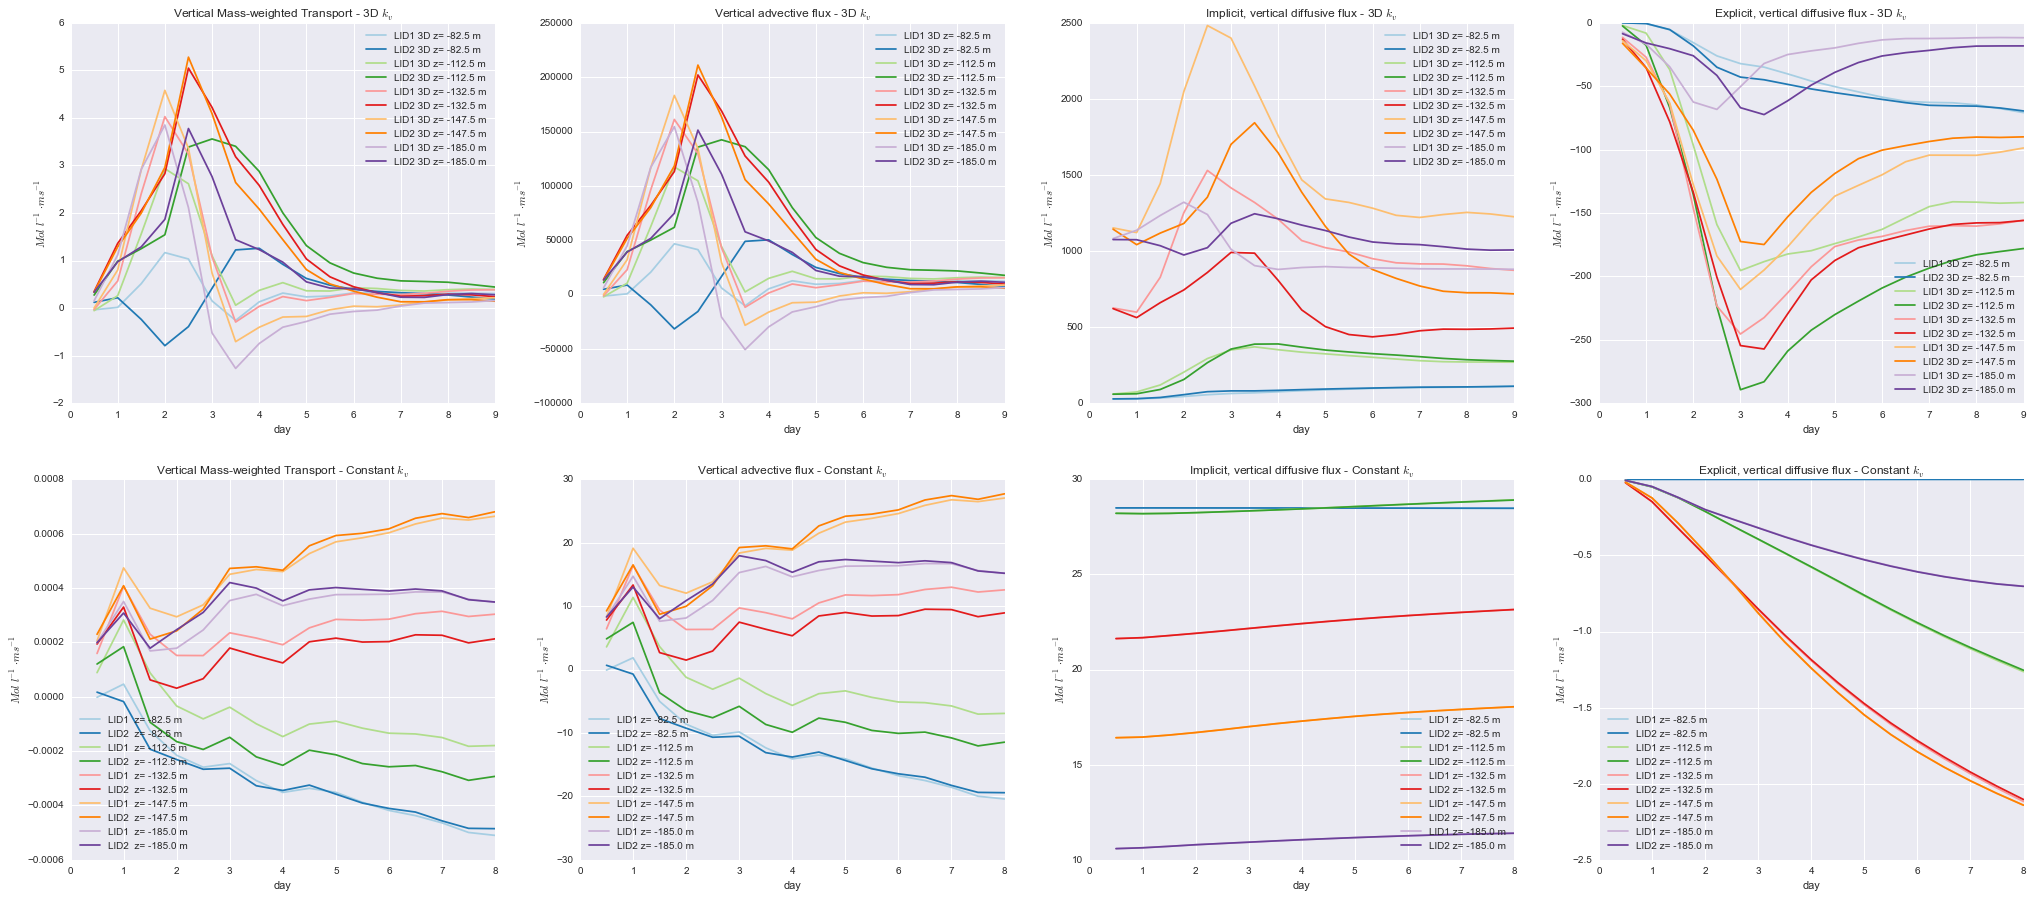

In [83]:
timearray = np.linspace(0.5,8,16)
timearray3D = np.linspace(0.5,9,18)
depths = [16,22,26,29,35]
figSize=(35,15)

unitsTr = '$Mol\ l^{-1}\cdot ms^{-1}$'


fig44 = plt.figure(figsize=figSize)
     
kk = 1
    
with sns.color_palette("Paired",10):
    for zz in depths:

        FluxV3D = WTRAC013D[:,zz,197:230,120:180]

        plt.subplot(2,4,1)
        ax = plt.gca()

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = WTRAC013D[:,zz,197:230,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical Mass-weighted Transport - 3D $k_v$')
        
        ##
        
        plt.subplot(2,4,2)
        ax = plt.gca()
        
        FluxV3D = ADVrTR013D[:,zz,197:230,120:180]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = ADVrTR013D[:,zz,197:230,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical advective flux - 3D $k_v$')
        
        ##
        
        plt.subplot(2,4,3)
        ax = plt.gca()
        
        FluxV3D = DFrITR013D[:,zz,197:230,120:180]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = DFrITR013D[:,zz,197:230,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Implicit, vertical diffusive flux - 3D $k_v$')
        
         ##
        
        plt.subplot(2,4,4)
        ax = plt.gca()
        
        FluxV3D = DFrETR013D[:,zz,197:230,120:180]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = DFrETR013D[:,zz,197:230,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Explicit, vertical diffusive flux - 3D $k_v$')
        
        ######
    
        FluxV = WTRAC01[:,zz,197:230,120:180]

        plt.subplot(2,4,5)
        ax = plt.gca()

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1  z= %.1f m' %z[zz]))

        FluxV = WTRAC01[:,zz,197:230,180:240]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2  z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical Mass-weighted Transport - Constant $k_v$')
        
        ##
        
        plt.subplot(2,4,6)
        ax = plt.gca()
        
        FluxV = ADVrTR01[:,zz,197:230,120:180]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1 z= %.1f m' %z[zz]))

        FluxV = ADVrTR01[:,zz,197:230,180:240]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2 z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical advective flux - Constant $k_v$')
        
        ##
        
        plt.subplot(2,4,7)
        ax = plt.gca()
        
        FluxV = DFrITR01[:,zz,197:230,120:180]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1 z= %.1f m' %z[zz]))

        FluxV= DFrITR01[:,zz,197:230,180:240]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2 z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Implicit, vertical diffusive flux - Constant $k_v$')
        
         ##
        
        plt.subplot(2,4,8)
        ax = plt.gca()
        
        FluxV = DFrETR01[:,zz,197:230,120:180]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1 z= %.1f m' %z[zz]))

        FluxV = DFrETR01[:,zz,197:230,180:240]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2 z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Explicit, vertical diffusive flux - Constant $k_v$')

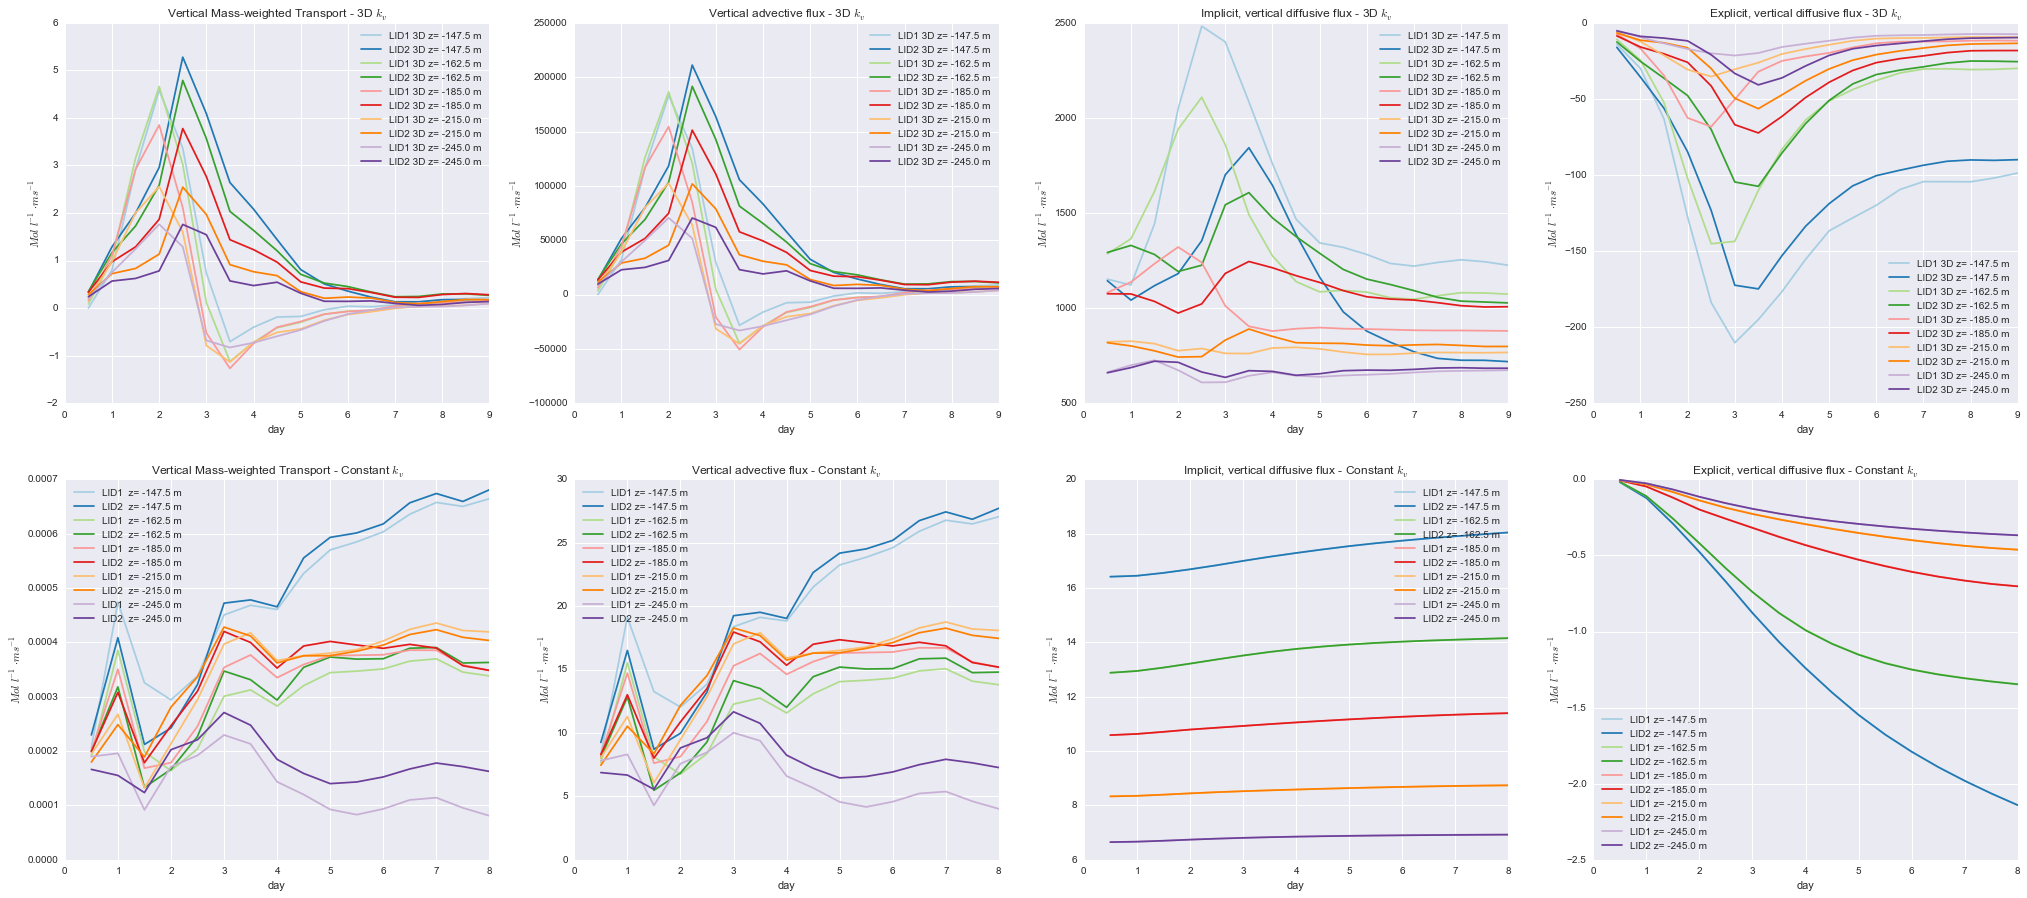

In [85]:
timearray = np.linspace(0.5,8,16)
timearray3D = np.linspace(0.5,9,18)
depths = [29,32,35,38,41]
figSize=(35,15)

unitsTr = '$Mol\ l^{-1}\cdot ms^{-1}$'


fig44 = plt.figure(figsize=figSize)
     
kk = 1
    
with sns.color_palette("Paired",10):
    for zz in depths:

        FluxV3D = WTRAC013D[:,zz,197:230,120:180]

        plt.subplot(2,4,1)
        ax = plt.gca()

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = WTRAC013D[:,zz,197:230,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical Mass-weighted Transport - 3D $k_v$')
        
        ##
        
        plt.subplot(2,4,2)
        ax = plt.gca()
        
        FluxV3D = ADVrTR013D[:,zz,197:230,120:180]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = ADVrTR013D[:,zz,197:230,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical advective flux - 3D $k_v$')
        
        ##
        
        plt.subplot(2,4,3)
        ax = plt.gca()
        
        FluxV3D = DFrITR013D[:,zz,197:230,120:180]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = DFrITR013D[:,zz,197:230,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Implicit, vertical diffusive flux - 3D $k_v$')
        
         ##
        
        plt.subplot(2,4,4)
        ax = plt.gca()
        
        FluxV3D = DFrETR013D[:,zz,197:230,120:180]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID1 3D z= %.1f m' %z[zz]))

        FluxV3D = DFrETR013D[:,zz,197:230,180:240]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('LID2 3D z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Explicit, vertical diffusive flux - 3D $k_v$')
        
        ######
    
        FluxV = WTRAC01[:,zz,197:230,120:180]

        plt.subplot(2,4,5)
        ax = plt.gca()

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1  z= %.1f m' %z[zz]))

        FluxV = WTRAC01[:,zz,197:230,180:240]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2  z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical Mass-weighted Transport - Constant $k_v$')
        
        ##
        
        plt.subplot(2,4,6)
        ax = plt.gca()
        
        FluxV = ADVrTR01[:,zz,197:230,120:180]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1 z= %.1f m' %z[zz]))

        FluxV = ADVrTR01[:,zz,197:230,180:240]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2 z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical advective flux - Constant $k_v$')
        
        ##
        
        plt.subplot(2,4,7)
        ax = plt.gca()
        
        FluxV = DFrITR01[:,zz,197:230,120:180]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1 z= %.1f m' %z[zz]))

        FluxV= DFrITR01[:,zz,197:230,180:240]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2 z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Implicit, vertical diffusive flux - Constant $k_v$')
        
         ##
        
        plt.subplot(2,4,8)
        ax = plt.gca()
        
        FluxV = DFrETR01[:,zz,197:230,120:180]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID1 z= %.1f m' %z[zz]))

        FluxV = DFrETR01[:,zz,197:230,180:240]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('LID2 z= %.1f m' %z[zz]))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Explicit, vertical diffusive flux - Constant $k_v$')

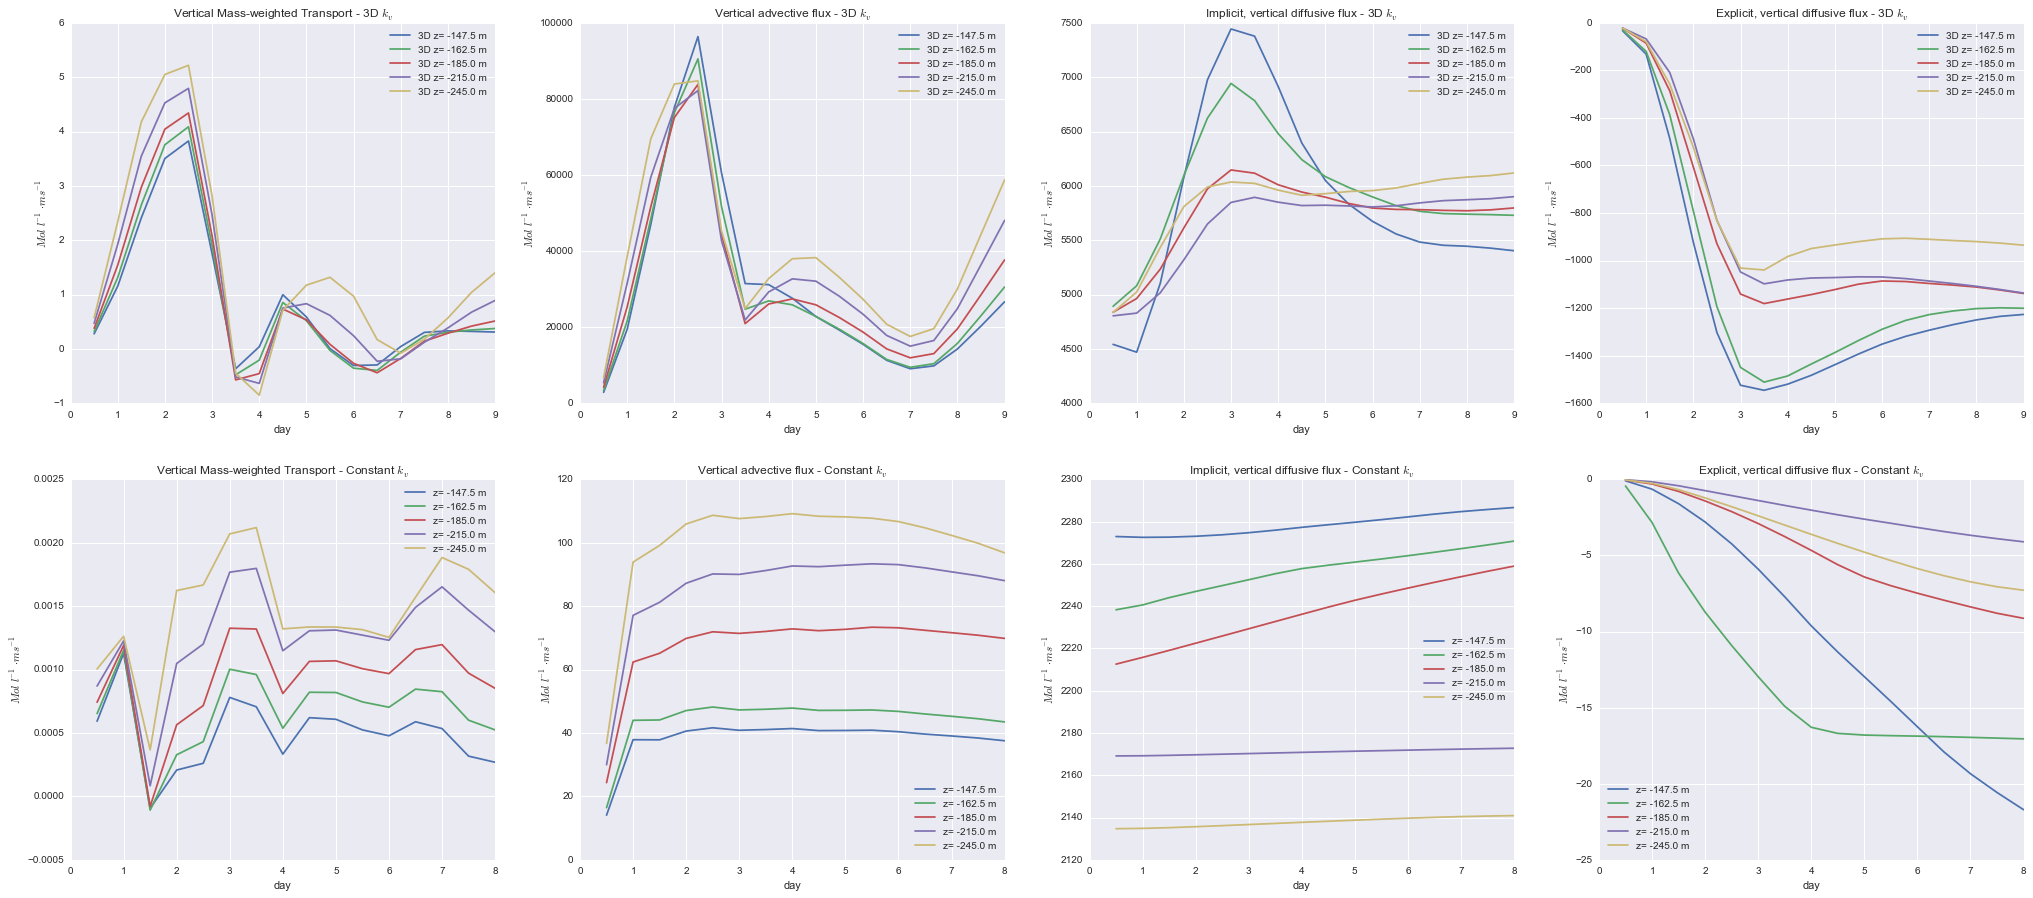

In [90]:
timearray = np.linspace(0.5,8,16)
timearray3D = np.linspace(0.5,9,18)
depths = [29,32,35,38,41]
figSize=(35,15)

unitsTr = '$Mol\ l^{-1}\cdot ms^{-1}$'


fig44 = plt.figure(figsize=figSize)
     
kk = 1
    
with sns.color_palette():
    for zz in depths:

        FluxV3D = WTRAC013D[:,zz,:,:]

        plt.subplot(2,4,1)
        ax = plt.gca()

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('3D z= %.1f m' %z[zz]))

    
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical Mass-weighted Transport - 3D $k_v$')
        
        ##
        
        plt.subplot(2,4,2)
        ax = plt.gca()
        
        FluxV3D = ADVrTR013D[:,zz,:,:]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('3D z= %.1f m' %z[zz]))

        
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical advective flux - 3D $k_v$')
        
        ##
        
        plt.subplot(2,4,3)
        ax = plt.gca()
        
        FluxV3D = DFrITR013D[:,zz,:,:]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('3D z= %.1f m' %z[zz]))

       
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Implicit, vertical diffusive flux - 3D $k_v$')
        
         ##
        
        plt.subplot(2,4,4)
        ax = plt.gca()
        
        FluxV3D = DFrETR013D[:,zz,:,:]

        ax.plot(timearray3D,np.sum(np.sum(FluxV3D,2),1),label=('3D z= %.1f m' %z[zz]))

        
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Explicit, vertical diffusive flux - 3D $k_v$')
        
        ######
    
        FluxV = WTRAC01[:,zz,:,:]

        plt.subplot(2,4,5)
        ax = plt.gca()

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('z= %.1f m' %z[zz]))

        
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical Mass-weighted Transport - Constant $k_v$')
        
        ##
        
        plt.subplot(2,4,6)
        ax = plt.gca()
        
        FluxV = ADVrTR01[:,zz,:,:]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('z= %.1f m' %z[zz]))

        
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Vertical advective flux - Constant $k_v$')
        
        ##
        
        plt.subplot(2,4,7)
        ax = plt.gca()
        
        FluxV = DFrITR01[:,zz,:,:]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('z= %.1f m' %z[zz]))

        
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Implicit, vertical diffusive flux - Constant $k_v$')
        
         ##
        
        plt.subplot(2,4,8)
        ax = plt.gca()
        
        FluxV = DFrETR01[:,zz,:,:]

        ax.plot(timearray,np.sum(np.sum(FluxV,2),1),label=('z= %.1f m' %z[zz]))

        
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=0)

        plt.xlabel('day')
        plt.ylabel(unitsTr)
        plt.title('Explicit, vertical diffusive flux - Constant $k_v$')